In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

data_path='/content/drive/MyDrive/airlinedelaycauses.csv'
df = pd.read_csv(data_path)

FileNotFoundError: ignored

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,precision_score
import math
import time

In [ ]:
df1=pd.DataFrame(df)

In [ ]:
df1

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2009,11,AS,Alaska Airlines Inc.,BRW,"Barrow, AK: Wiley Post/Will Rogers Memorial",65.0,14.0,3.61,1.06,...,6.19,0.0,1.0,920.0,592.0,34.0,78.0,0.0,216.0,NaN
1,2009,11,AS,Alaska Airlines Inc.,BUR,"Burbank, CA: Bob Hope",85.0,5.0,1.00,0.00,...,0.98,0.0,0.0,134.0,25.0,0.0,70.0,0.0,39.0,NaN
2,2009,11,AS,Alaska Airlines Inc.,CDV,"Cordova, AK: Merle K Mudhole Smith",58.0,8.0,2.04,1.00,...,2.96,4.0,2.0,586.0,174.0,37.0,62.0,0.0,313.0,NaN
3,2009,11,AS,Alaska Airlines Inc.,DCA,"Washington, DC: Ronald Reagan Washington National",88.0,11.0,1.99,0.00,...,0.00,0.0,0.0,266.0,65.0,0.0,201.0,0.0,0.0,NaN
4,2009,11,AS,Alaska Airlines Inc.,DEN,"Denver, CO: Denver International",123.0,5.0,3.47,0.00,...,0.00,0.0,0.0,81.0,57.0,0.0,24.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29808,2012,10,MQ,American Eagle Airlines Inc.,AMA,"Amarillo, TX: Rick Husband Amarillo International",240.0,17.0,8.80,0.90,...,5.48,1.0,0.0,526.0,292.0,18.0,54.0,0.0,162.0,NaN
29809,2012,10,MQ,American Eagle Airlines Inc.,DSM,"Des Moines, IA: Des Moines International",294.0,46.0,14.00,2.31,...,12.79,3.0,1.0,1939.0,462.0,168.0,604.0,0.0,705.0,NaN
29810,2012,10,MQ,American Eagle Airlines Inc.,ABI,"Abilene, TX: Abilene Regional",209.0,29.0,14.79,0.71,...,5.19,0.0,0.0,978.0,489.0,12.0,285.0,0.0,192.0,NaN
29811,2012,10,MQ,American Eagle Airlines Inc.,TXK,"Texarkana, AR: Texarkana Regional-Webb Field",89.0,6.0,3.08,0.00,...,2.86,0.0,0.0,199.0,105.0,0.0,3.0,0.0,91.0,NaN


In [ ]:
df1.isnull().sum()

year                       0
 month                     0
carrier                    0
carrier_name               0
airport                    0
airport_name               0
arr_flights               34
arr_del15                 44
carrier_ct                34
 weather_ct               34
nas_ct                    34
security_ct               34
late_aircraft_ct          34
arr_cancelled             34
arr_diverted              35
 arr_delay                35
 carrier_delay            35
weather_delay             35
nas_delay                 35
security_delay            35
late_aircraft_delay       35
Unnamed: 21            29813
dtype: int64

In [ ]:
df1.drop("Unnamed: 21",axis=1,inplace=True)

In [ ]:
df1.columns

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [ ]:
df1.rename(columns={ ' month':'month'},inplace=True)

In [ ]:
df1.dropna(axis=0,inplace=True)

In [ ]:
df1.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
 weather_ct            0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
 arr_delay             0
 carrier_delay         0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [ ]:
df1.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2009,11,AS,Alaska Airlines Inc.,BRW,"Barrow, AK: Wiley Post/Will Rogers Memorial",65.0,14.0,3.61,1.06,...,0.0,6.19,0.0,1.0,920.0,592.0,34.0,78.0,0.0,216.0
1,2009,11,AS,Alaska Airlines Inc.,BUR,"Burbank, CA: Bob Hope",85.0,5.0,1.00,0.00,...,0.0,0.98,0.0,0.0,134.0,25.0,0.0,70.0,0.0,39.0
2,2009,11,AS,Alaska Airlines Inc.,CDV,"Cordova, AK: Merle K Mudhole Smith",58.0,8.0,2.04,1.00,...,0.0,2.96,4.0,2.0,586.0,174.0,37.0,62.0,0.0,313.0
3,2009,11,AS,Alaska Airlines Inc.,DCA,"Washington, DC: Ronald Reagan Washington National",88.0,11.0,1.99,0.00,...,0.0,0.00,0.0,0.0,266.0,65.0,0.0,201.0,0.0,0.0
4,2009,11,AS,Alaska Airlines Inc.,DEN,"Denver, CO: Denver International",123.0,5.0,3.47,0.00,...,0.0,0.00,0.0,0.0,81.0,57.0,0.0,24.0,0.0,0.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29768 entries, 0 to 29811
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 29768 non-null  int64  
 1   month                29768 non-null  int64  
 2   carrier              29768 non-null  object 
 3   carrier_name         29768 non-null  object 
 4   airport              29768 non-null  object 
 5   airport_name         29768 non-null  object 
 6   arr_flights          29768 non-null  float64
 7   arr_del15            29768 non-null  float64
 8   carrier_ct           29768 non-null  float64
 9    weather_ct          29768 non-null  float64
 10  nas_ct               29768 non-null  float64
 11  security_ct          29768 non-null  float64
 12  late_aircraft_ct     29768 non-null  float64
 13  arr_cancelled        29768 non-null  float64
 14  arr_diverted         29768 non-null  float64
 15   arr_delay           29768 non-null 

In [ ]:
df2=df1.iloc[:,:21]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29768 entries, 0 to 29811
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 29768 non-null  int64  
 1   month                29768 non-null  int64  
 2   carrier              29768 non-null  object 
 3   carrier_name         29768 non-null  object 
 4   airport              29768 non-null  object 
 5   airport_name         29768 non-null  object 
 6   arr_flights          29768 non-null  float64
 7   arr_del15            29768 non-null  float64
 8   carrier_ct           29768 non-null  float64
 9    weather_ct          29768 non-null  float64
 10  nas_ct               29768 non-null  float64
 11  security_ct          29768 non-null  float64
 12  late_aircraft_ct     29768 non-null  float64
 13  arr_cancelled        29768 non-null  float64
 14  arr_diverted         29768 non-null  float64
 15   arr_delay           29768 non-null 

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df2['carrier']= label_encoder.fit_transform(df2['carrier'])
df2['carrier_name']= label_encoder.fit_transform(df2['carrier_name'])
df2['airport']= label_encoder.fit_transform(df2['airport'])
df2['airport_name']= label_encoder.fit_transform(df2['airport_name'])

In [ ]:
df2.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [ ]:
df2

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2009,11,2,2,53,25,65.0,14.0,3.61,1.06,...,0.0,6.19,0.0,1.0,920.0,592.0,34.0,78.0,0.0,216.0
1,2009,11,2,2,58,47,85.0,5.0,1.00,0.00,...,0.0,0.98,0.0,0.0,134.0,25.0,0.0,70.0,0.0,39.0
2,2009,11,2,2,64,80,58.0,8.0,2.04,1.00,...,0.0,2.96,4.0,2.0,586.0,174.0,37.0,62.0,0.0,313.0
3,2009,11,2,2,96,365,88.0,11.0,1.99,0.00,...,0.0,0.00,0.0,0.0,266.0,65.0,0.0,201.0,0.0,0.0
4,2009,11,2,2,97,89,123.0,5.0,3.47,0.00,...,0.0,0.00,0.0,0.0,81.0,57.0,0.0,24.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29807,2012,10,13,6,148,132,89.0,13.0,7.12,0.00,...,0.0,2.28,0.0,0.0,506.0,302.0,0.0,89.0,0.0,115.0
29808,2012,10,13,6,16,11,240.0,17.0,8.80,0.90,...,0.0,5.48,1.0,0.0,526.0,292.0,18.0,54.0,0.0,162.0
29809,2012,10,13,6,104,90,294.0,46.0,14.00,2.31,...,0.0,12.79,3.0,1.0,1939.0,462.0,168.0,604.0,0.0,705.0
29810,2012,10,13,6,1,1,209.0,29.0,14.79,0.71,...,0.0,5.19,0.0,0.0,978.0,489.0,12.0,285.0,0.0,192.0


In [ ]:
scaled_df2=StandardScaler().fit_transform(df2)

In [ ]:
scaled_df2

array([[-0.50274191,  1.34184009, -1.310139  , ..., -0.2261085 ,
        -0.17651504, -0.27547624],
       [-0.50274191,  1.34184009, -1.310139  , ..., -0.2279909 ,
        -0.17651504, -0.31283356],
       [-0.50274191,  1.34184009, -1.310139  , ..., -0.2298733 ,
        -0.17651504, -0.25500359],
       ...,
       [ 0.06194169,  1.0520661 ,  0.08888526, ..., -0.1023407 ,
        -0.17651504, -0.17226875],
       [ 0.06194169,  1.0520661 ,  0.08888526, ..., -0.1774014 ,
        -0.17651504, -0.28054164],
       [ 0.06194169,  1.0520661 ,  0.08888526, ..., -0.243756  ,
        -0.17651504, -0.30185853]])

In [ ]:
scaled_df1=pd.DataFrame(scaled_df2,columns=['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],index=range(29768))

In [ ]:
scaled_df1

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,-0.502742,1.341840,-1.310139,-1.573929,-1.318310,-1.517115,-0.308157,-0.292065,-0.368559,-0.145178,...,-0.239621,-0.248237,-0.245421,0.045893,-0.256383,-0.185423,-0.213701,-0.226109,-0.176515,-0.275476
1,-0.502742,1.341840,-1.310139,-1.573929,-1.271693,-1.316399,-0.288529,-0.340309,-0.430229,-0.256357,...,-0.239621,-0.321713,-0.245421,-0.245582,-0.322714,-0.364556,-0.254670,-0.227991,-0.176515,-0.312834
2,-0.502742,1.341840,-1.310139,-1.573929,-1.215753,-1.015325,-0.315027,-0.324228,-0.405655,-0.151471,...,-0.239621,-0.293789,-0.111745,0.337368,-0.284569,-0.317482,-0.210086,-0.229873,-0.176515,-0.255004
3,-0.502742,1.341840,-1.310139,-1.573929,-0.917405,1.584857,-0.285585,-0.308146,-0.406837,-0.256357,...,-0.239621,-0.335534,-0.245421,-0.245582,-0.311575,-0.351919,-0.254670,-0.197167,-0.176515,-0.321065
4,-0.502742,1.341840,-1.310139,-1.573929,-0.908082,-0.933214,-0.251236,-0.340309,-0.371867,-0.256357,...,-0.239621,-0.335534,-0.245421,-0.245582,-0.327187,-0.354446,-0.254670,-0.238815,-0.176515,-0.321065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29763,0.061942,1.052066,0.088885,-1.112367,-0.432591,-0.540906,-0.284603,-0.297426,-0.285624,-0.256357,...,-0.239621,-0.303379,-0.245421,-0.245582,-0.291321,-0.277043,-0.254670,-0.223520,-0.176515,-0.296793
29764,0.061942,1.052066,0.088885,-1.112367,-1.663274,-1.644843,-0.136411,-0.275984,-0.245929,-0.161959,...,-0.239621,-0.258250,-0.212002,-0.245582,-0.289633,-0.280202,-0.232980,-0.231756,-0.176515,-0.286873
29765,0.061942,1.052066,0.088885,-1.112367,-0.842819,-0.924091,-0.083415,-0.120532,-0.123062,-0.014069,...,-0.239621,-0.155157,-0.145164,0.045893,-0.170388,-0.226494,-0.052232,-0.102341,-0.176515,-0.172269
29766,0.061942,1.052066,0.088885,-1.112367,-1.803125,-1.736078,-0.166835,-0.211659,-0.104396,-0.181888,...,-0.239621,-0.262340,-0.245421,-0.245582,-0.251488,-0.217964,-0.240210,-0.177401,-0.176515,-0.280542


In [ ]:
X=scaled_df1.drop("arr_del15",axis=1)
y1=scaled_df1['arr_del15']

In [ ]:
#GETTING THE NUMBER OF COMPONENTS
from sklearn.decomposition import PCA
pca = PCA().fit(X)
np.cumsum(pca.explained_variance_ratio_)

array([0.47291882, 0.56183713, 0.64815452, 0.72194221, 0.78528769,
       0.83211109, 0.85988963, 0.88554418, 0.90885685, 0.92971783,
       0.94933114, 0.96186861, 0.97356841, 0.98503208, 0.99196738,
       0.99598941, 0.99784245, 0.99939026, 1.        , 1.        ])

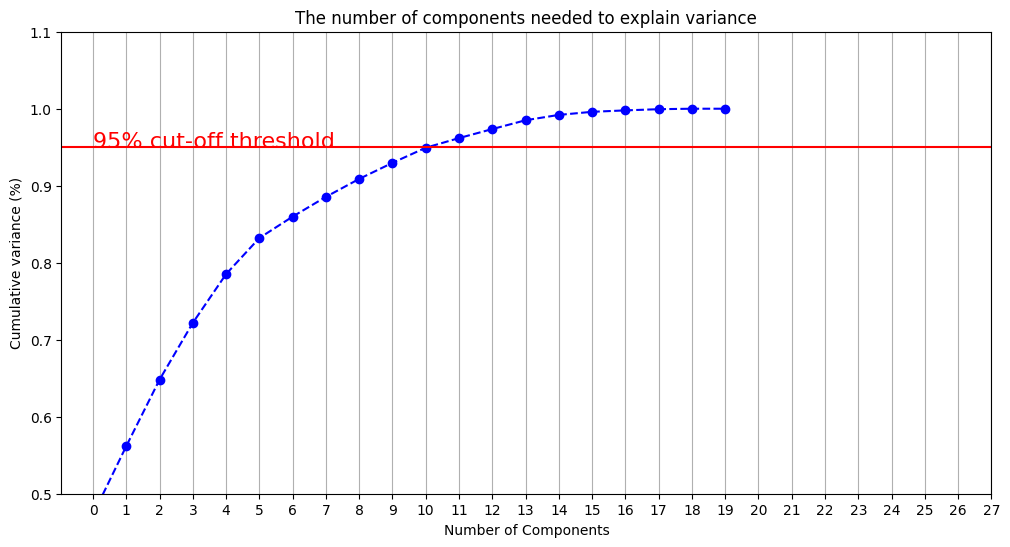

In [ ]:
pca = PCA().fit(X)
np.cumsum(pca.explained_variance_ratio_)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(0, 20, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.5,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 28, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95,color='r', linestyle='-')
plt.text(0, 0.95, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
#CHOOSING THE IMPORTANT COMPONENTS
model = PCA(n_components=10).fit(scaled_df1)
X_pc = model.transform(scaled_df1)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = ['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,carrier_ct
1,PC1,airport
2,PC2,carrier_name
3,PC3,year
4,PC4,late_aircraft_delay
5,PC5,nas_ct
6,PC6,security_delay
7,PC7,arr_delay
8,PC8,month
9,PC9,arr_diverted


In [ ]:
z=pd.DataFrame(most_important_names)

In [ ]:
z[0].unique()

array(['carrier_ct', 'airport', 'carrier_name', 'year',
       'late_aircraft_delay', 'nas_ct', 'security_delay', ' arr_delay',
       'month', 'arr_diverted'], dtype=object)

In [ ]:
X1=scaled_df1[['carrier_ct', 'airport', 'carrier_name', 'year',
       'late_aircraft_delay', 'nas_ct', 'security_delay', ' arr_delay',
       'month', 'arr_diverted']]

In [ ]:
X1

,carrier_ct,airport,carrier_name,year,late_aircraft_delay,nas_ct,security_delay,arr_delay,month,arr_diverted
0,-0.368559,-1.318310,-1.573929,-0.502742,-0.275476,-0.243414,-0.176515,-0.256383,1.341840,0.045893
1,-0.430229,-1.271693,-1.573929,-0.502742,-0.312834,-0.244771,-0.176515,-0.322714,1.341840,-0.245582
2,-0.405655,-1.215753,-1.573929,-0.502742,-0.255004,-0.257481,-0.176515,-0.284569,1.341840,0.337368
3,-0.406837,-0.917405,-1.573929,-0.502742,-0.321065,-0.170980,-0.176515,-0.311575,1.341840,-0.245582
4,-0.371867,-0.908082,-1.573929,-0.502742,-0.321065,-0.263281,-0.176515,-0.327187,1.341840,-0.245582
...,...,...,...,...,...,...,...,...,...,...
29763,-0.285624,-0.432591,-1.112367,0.061942,-0.296793,-0.237738,-0.176515,-0.291321,1.052066,-0.245582
29764,-0.245929,-1.663274,-1.112367,0.061942,-0.286873,-0.259702,-0.176515,-0.289633,1.052066,-0.245582
29765,-0.123062,-0.842819,-1.112367,0.061942,-0.172269,-0.073619,-0.176515,-0.170388,1.052066,0.045893
29766,-0.104396,-1.803125,-1.112367,0.061942,-0.280542,-0.179617,-0.176515,-0.251488,1.052066,-0.245582


In [ ]:
from sklearn.model_selection import train_test_split


# split into 70:20 ration
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression

# Create an instance of the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
# Calculate adjusted R-squared
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error (MSE): 0.007246347567877654
R-squared: 0.992728370115383
Adjusted R-squared: 0.9927202180639428


Text(0.5, 1.0, 'Residual Plot')

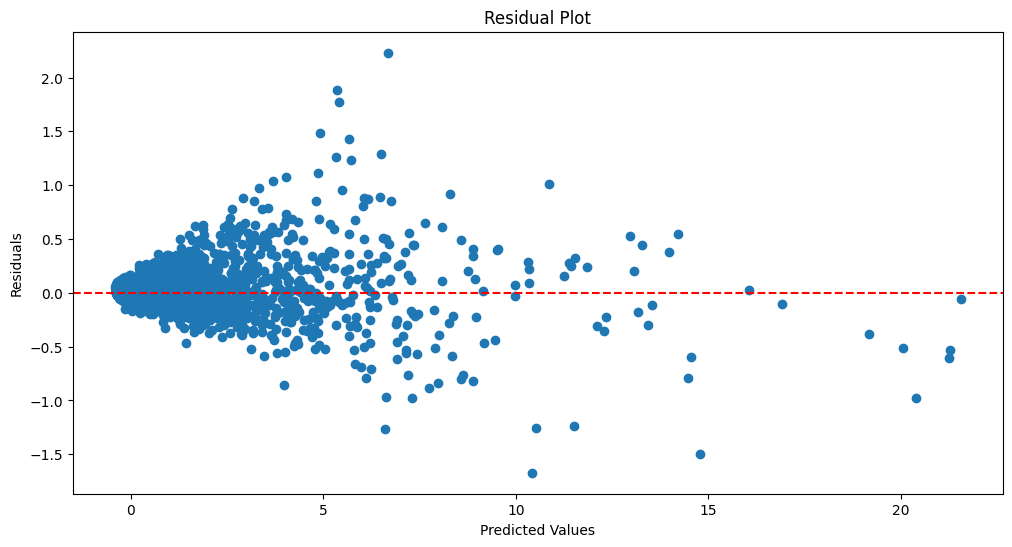

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train is the training data and y_train is the corresponding target values
# Assuming model is the trained linear regression model

# Make predictions on the training data
y_pred = model.predict(X_train)

# Calculate the residuals
residuals = y_train - y_pred

# Create a scatter plot of predicted values against residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

In [ ]:
from sklearn.linear_model import Ridge

# Create an instance of the Ridge Regression model
model = Ridge(alpha=0.01)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred1= model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred1)
print("Mean Squared Error (MSE):", mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred1)
# Calculate adjusted R-squared
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error (MSE): 0.007246303698846224
R-squared: 0.9927284141374723
Adjusted R-squared: 0.9927202621353842


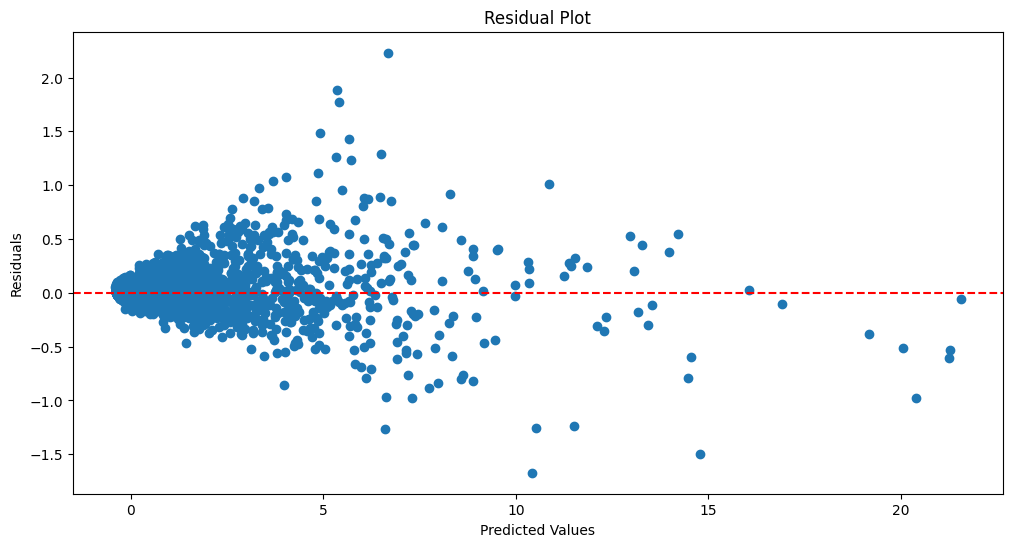

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train is the training data and y_train is the corresponding target values
# Assuming model is the trained linear regression model

# Make predictions on the training data
y_pred = model.predict(X_train)

# Calculate the residuals
residuals = y_train - y_pred

# Create a scatter plot of predicted values against residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
from sklearn.linear_model import Lasso

# Create an instance of the Lasso Regression model
model = Lasso(alpha=0.2)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
# Calculate adjusted R-squared
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error (MSE): 0.06722845856309108
R-squared: 0.9325369831070233
Adjusted R-squared: 0.9324613519221656


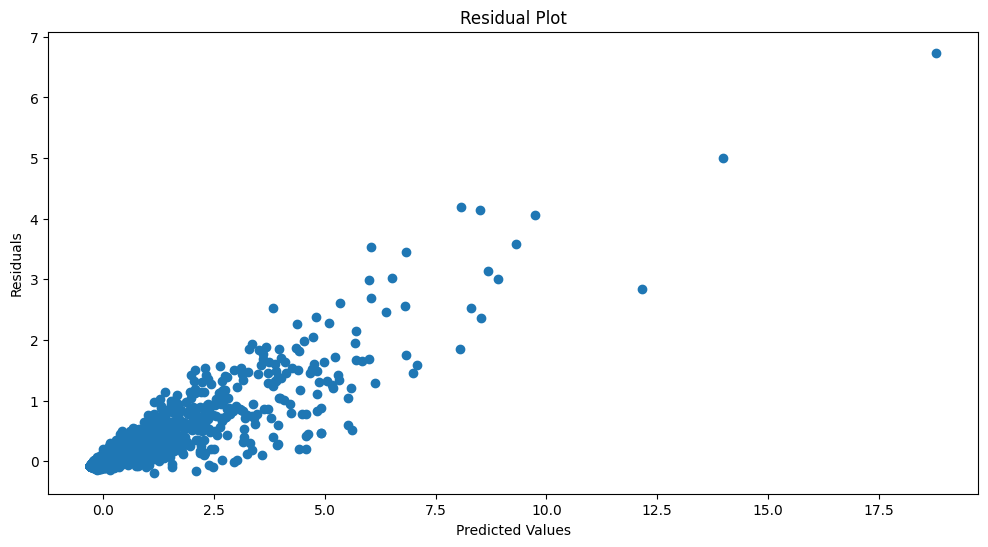

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train is the training data and y_train is the corresponding target values
# Assuming model is the trained linear regression model

# Make predictions on the training data
y_pred = model.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

# Create a scatter plot of predicted values against residuals
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
from sklearn.linear_model import Lasso

# Create an instance of the Lasso Regression model
model = Lasso(alpha=0.1)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
# Calculate adjusted R-squared
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error (MSE): 0.02451100048194823
R-squared: 0.9754034812797974
Adjusted R-squared: 0.9753759067072411


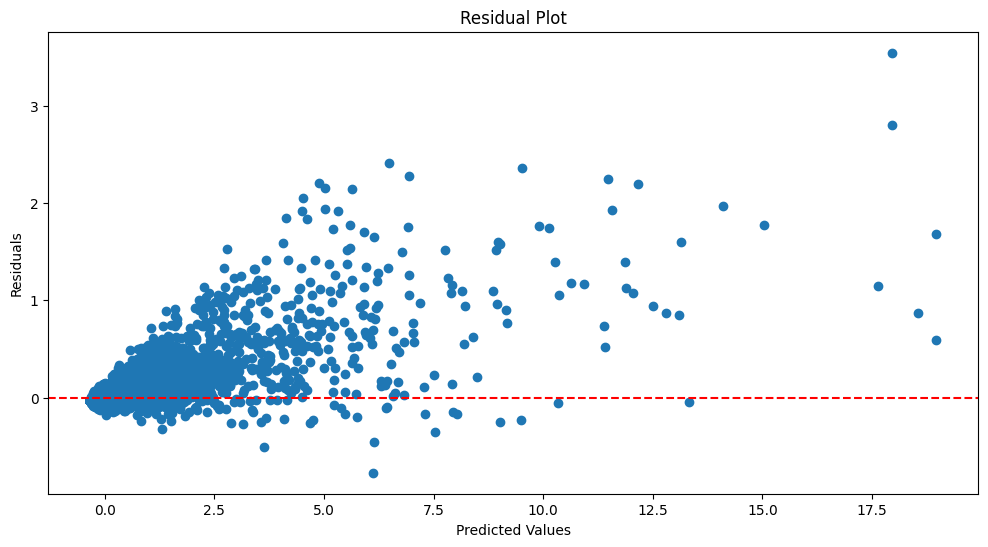

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train is the training data and y_train is the corresponding target values
# Assuming model is the trained linear regression model

# Make predictions on the training data
y_pred = model.predict(X_train)

# Calculate the residuals
residuals = y_train - y_pred

# Create a scatter plot of predicted values against residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
from sklearn.linear_model import Lasso

# Create an instance of the Lasso Regression model
model = Lasso(alpha=0.05)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
# Calculate adjusted R-squared
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error (MSE): 0.013170043366776333
R-squared: 0.9867840066971005
Adjusted R-squared: 0.9867691905611108


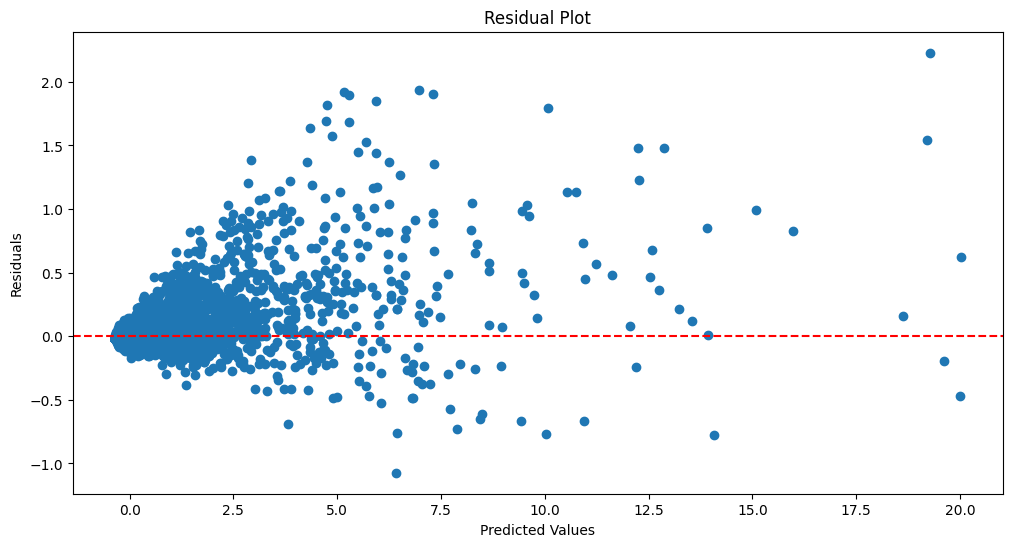

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train is the training data and y_train is the corresponding target values
# Assuming model is the trained linear regression model

# Make predictions on the training data
y_pred = model.predict(X_train)

# Calculate the residuals
residuals = y_train - y_pred

# Create a scatter plot of predicted values against residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
from sklearn.svm import SVR

# Create an instance of the SVR model
model = SVR(kernel='linear')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
# Calculate adjusted R-squared
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error (MSE): 0.007964522294578485
R-squared: 0.9920076896958838
Adjusted R-squared: 0.9919987297067536


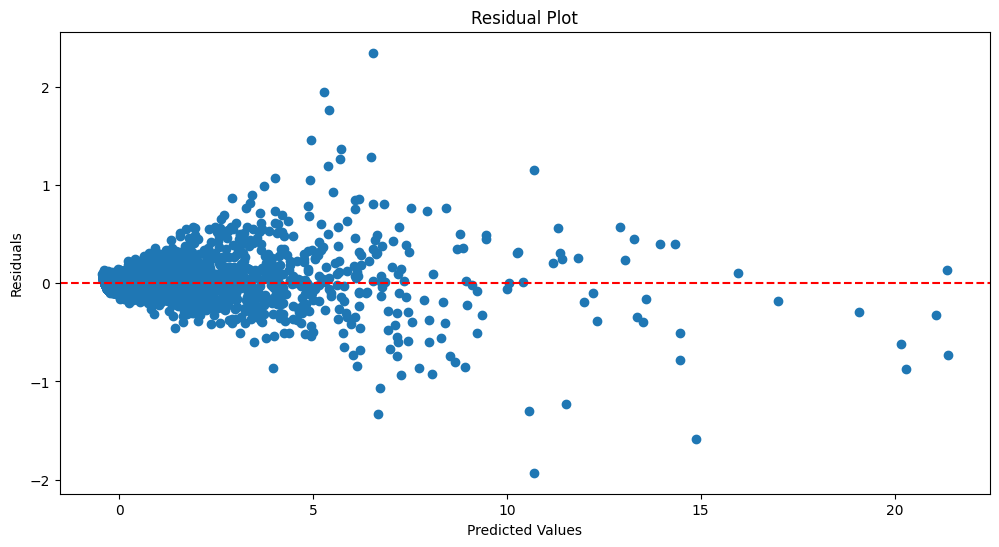

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train is the training data and y_train is the corresponding target values
# Assuming model is the trained linear regression model

# Make predictions on the training data
y_pred = model.predict(X_train)

# Calculate the residuals
residuals = y_train - y_pred

# Create a scatter plot of predicted values against residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create an instance of the Decision Tree Regression model
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
# Calculate adjusted R-squared
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error (MSE): 0.040157941221186204
R-squared: 0.9597019487744226
Adjusted R-squared: 0.95965677158695


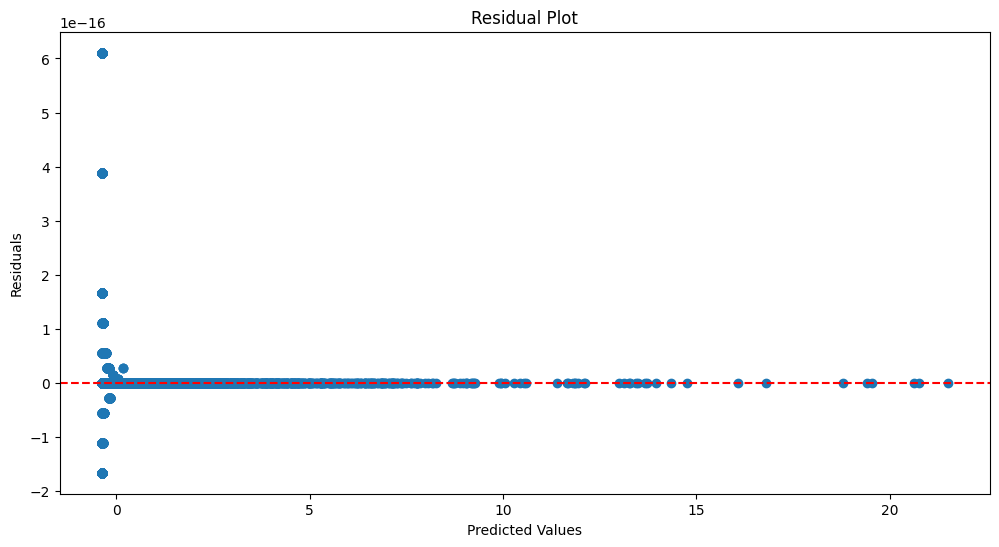

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train is the training data and y_train is the corresponding target values
# Assuming model is the trained linear regression model

# Make predictions on the training data
y_pred = model.predict(X_train)

# Calculate the residuals
residuals = y_train - y_pred

# Create a scatter plot of predicted values against residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
# Calculate adjusted R-squared
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error (MSE): 0.019501855540826122
R-squared: 0.9804301029963307
Adjusted R-squared: 0.980408163649914


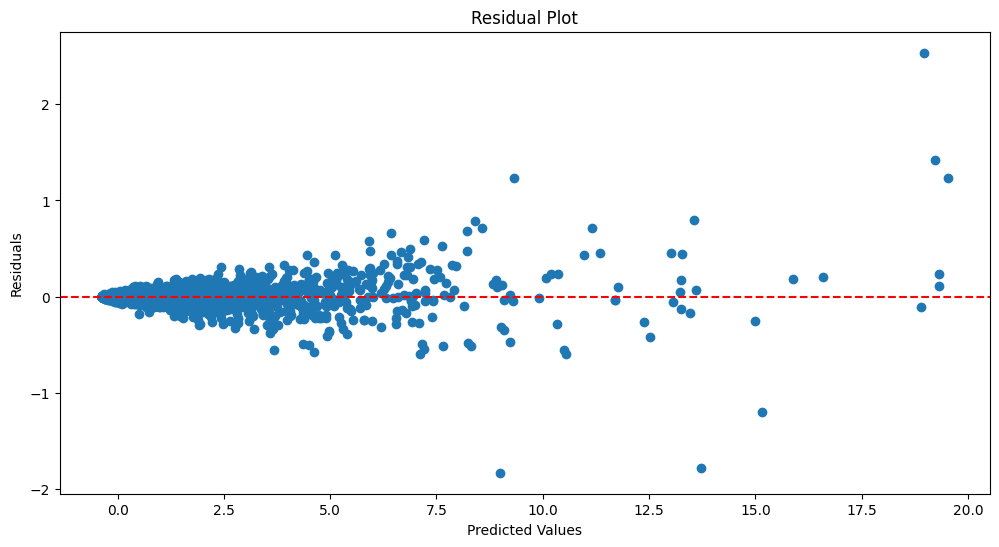

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train is the training data and y_train is the corresponding target values
# Assuming model is the trained linear regression model

# Make predictions on the training data
y_pred = model.predict(X_train)

# Calculate the residuals
residuals = y_train - y_pred

# Create a scatter plot of predicted values against residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()